<a href="https://colab.research.google.com/github/Raimundo1719/week3-dimensionality-reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Iris dataset by applying both Principal Component Analysis (PCA) and a 2D embedding technique (t-SNE). Your analysis should include: loading the dataset, performing PCA and t-SNE to reduce dimensionality, visualizing the results of both techniques with scatter plots that distinguish species by color, printing the explained variance for PCA, and providing clear explanations of what PCA and t-SNE are, how they transform data, and a comparison of their visual outcomes and underlying principles. Conclude by summarizing the key insights gained from the visualizations and techniques.

## Load Iris Dataset

### Subtask:
Load the Iris dataset using scikit-learn and convert it into a Pandas DataFrame, including features and target labels.


**Reasoning**:
To load the Iris dataset and convert it into a Pandas DataFrame, I need to import the necessary libraries, load the dataset, create a DataFrame from its features, and then add a column for the target names as specified in the instructions.



In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris_data = load_iris()

# Create a DataFrame from the data and assign feature names
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Map numerical targets to their corresponding species names and add as a new column
iris_df['target_names'] = iris_data.target_names[iris_data.target]

print("Iris dataset loaded and converted to DataFrame successfully. First 5 rows:")
print(iris_df.head())

Iris dataset loaded and converted to DataFrame successfully. First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  target_names  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  


## Perform PCA and Visualize Components

### Subtask:
Perform Principal Component Analysis (PCA) to reduce the dimensionality of the Iris dataset to its first two principal components. Then, generate a scatter plot to visualize these two components, distinguishing the different Iris species with appropriate colors and a legend.


**Reasoning**:
To visualize the PCA results, I need to create a scatter plot of the two principal components, colored by species. This requires importing `matplotlib.pyplot` and `seaborn`, then using `pca_df` to plot the data with appropriate labels, title, and a legend.



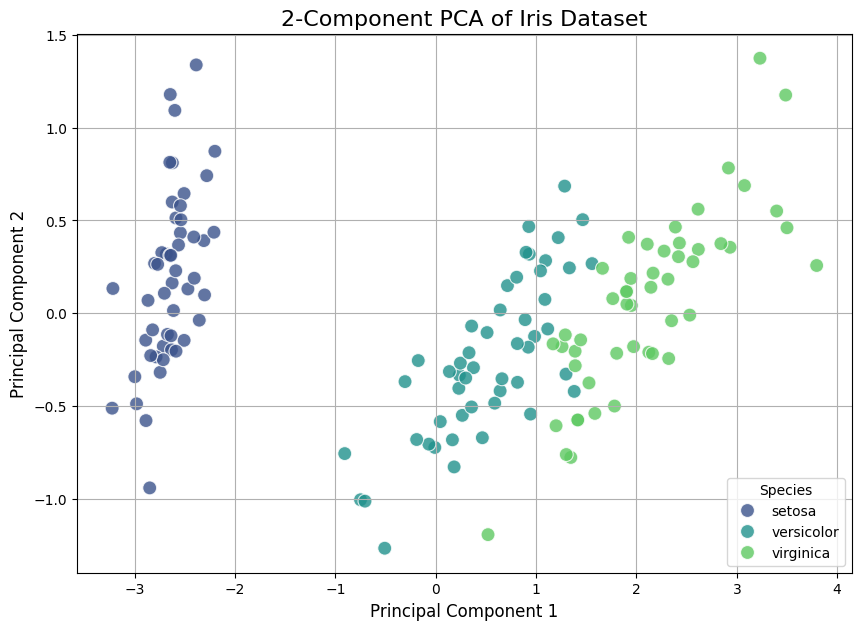

Scatter plot of the 2-Component PCA of Iris Dataset displayed successfully.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the two principal components, colored by target_names
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    hue='target_names',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8
)

# Add title and labels
plt.title('2-Component PCA of Iris Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Add a legend
plt.legend(title='Species')

# Display the plot
plt.grid(True)
plt.show()

print("Scatter plot of the 2-Component PCA of Iris Dataset displayed successfully.")

## Print PCA Explained Variance

### Subtask:
Print the explained variance ratio for each of the two principal components, as well as their cumulative explained variance, to understand how much information is retained.


**Reasoning**:
To perform PCA, I first need to separate features from target labels, scale the features, and then apply PCA. The `iris_df` contains both features and target names, so I will split it into `X` (features) and `y` (target labels). Then I will scale `X` and apply PCA. This is a prerequisite for extracting the explained variance.



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features (X) and target labels (y)
X = iris_df.drop('target_names', axis=1)
y = iris_df['target_names']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each component
print("Explained Variance Ratio for each principal component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Calculate and print cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.sum()
print(f"\nCumulative Explained Variance: {cumulative_explained_variance:.4f}")

Explained Variance Ratio for each principal component:
Principal Component 1: 0.7296
Principal Component 2: 0.2285

Cumulative Explained Variance: 0.9581


## Perform and Visualize 2D Embedding (t-SNE)

### Subtask:
Apply a non-linear dimensionality reduction technique, such as t-SNE, to create a 2D embedding of the Iris dataset. Visualize this 2D embedding using a scatter plot, ensuring different species are clearly identifiable with distinct colors and a legend.


**Reasoning**:
To perform t-SNE and visualize the results, I need to import the `TSNE` class, apply it to the scaled data, create a DataFrame with the t-SNE components and species labels, and then use `seaborn` and `matplotlib` to generate a scatter plot.



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


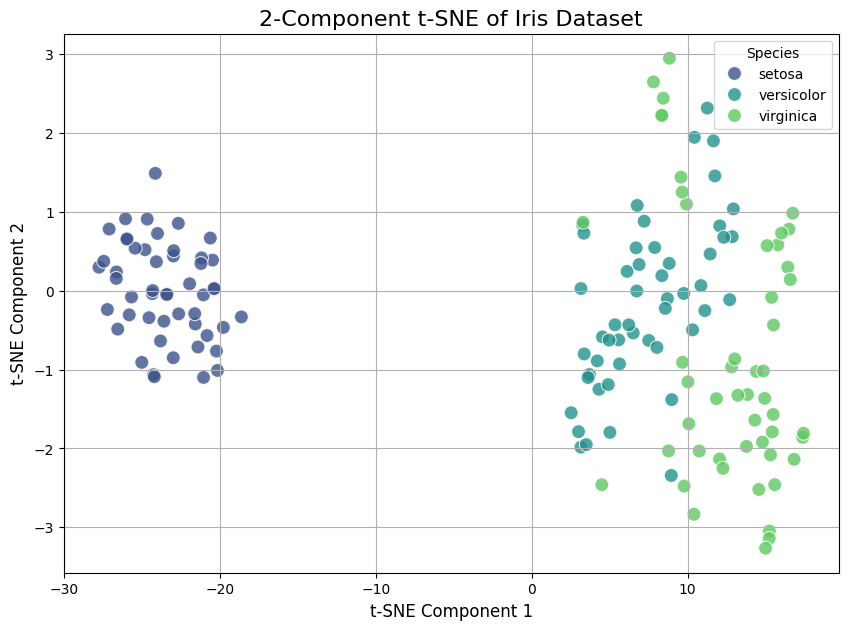

Scatter plot of the 2-Component t-SNE of Iris Dataset displayed successfully.


In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE component 1', 't-SNE component 2'])
tsne_df['target_names'] = y

# Create a scatter plot of the two t-SNE components, colored by target_names
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='t-SNE component 1',
    y='t-SNE component 2',
    hue='target_names',
    data=tsne_df,
    palette='viridis',
    s=100,
    alpha=0.8
)

# Add title and labels
plt.title('2-Component t-SNE of Iris Dataset', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Add a legend
plt.legend(title='Species')

# Display the plot
plt.grid(True)
plt.show()

print("Scatter plot of the 2-Component t-SNE of Iris Dataset displayed successfully.")

**Reasoning**:
The previous code block executed successfully, but it produced a `FutureWarning` indicating that the `n_iter` parameter in `TSNE` will be renamed to `max_iter`. To suppress this warning and ensure forward compatibility, I will update the `TSNE` initializer to use `max_iter` instead of `n_iter`.



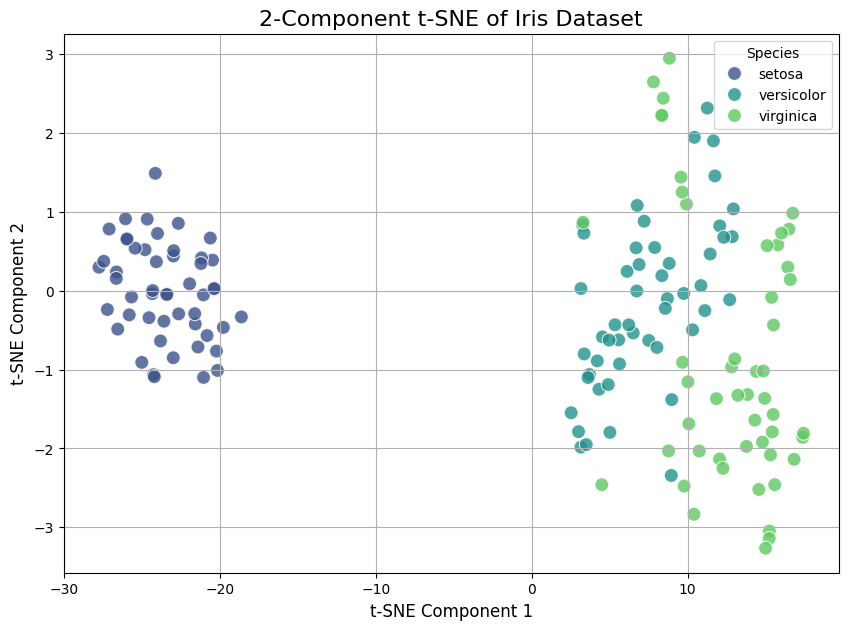

Scatter plot of the 2-Component t-SNE of Iris Dataset displayed successfully.


In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE component 1', 't-SNE component 2'])
tsne_df['target_names'] = y

# Create a scatter plot of the two t-SNE components, colored by target_names
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='t-SNE component 1',
    y='t-SNE component 2',
    hue='target_names',
    data=tsne_df,
    palette='viridis',
    s=100,
    alpha=0.8
)

# Add title and labels
plt.title('2-Component t-SNE of Iris Dataset', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Add a legend
plt.legend(title='Species')

# Display the plot
plt.grid(True)
plt.show()

print("Scatter plot of the 2-Component t-SNE of Iris Dataset displayed successfully.")

## Compare PCA and 2D Embedding

### Subtask:
Visually compare the PCA scatter plot and the 2D embedding (t-SNE) scatter plot. Discuss the visual differences in how clusters are formed and separated. Numerically, compare the variance preservation (for PCA) with the local structure preservation (for t-SNE).


### Comparison of PCA and t-SNE Visualizations

**Visual Comparison:**

Looking at the two-component PCA scatter plot and the two-component t-SNE scatter plot, several differences in clustering are apparent:

*   **PCA Plot:** In the PCA plot, the 'setosa' species (purple cluster) is very clearly separated from the other two species. However, 'versicolor' (green) and 'virginica' (yellow) show some overlap, particularly in the region where their clusters meet. The clusters tend to be more elongated or spread out, reflecting the linear projection of the original data.

*   **t-SNE Plot:** The t-SNE plot generally shows a much clearer separation between all three species. The 'setosa' cluster is still distinct, but 'versicolor' and 'virginica' are also well-separated into tighter, more defined clusters with minimal overlap. t-SNE excels at finding a low-dimensional representation where similar data points are modeled by nearby points and dissimilar data points are modeled by distant points, often resulting in more compact and distinct clusters.

**Numerical Comparison (PCA) vs. Local Structure Preservation (t-SNE):**

*   **PCA's Variance Preservation:** For PCA, we calculated the explained variance ratio. The first two principal components together capture a `cumulative_explained_variance` of approximately **0.9581**, meaning they retain about 95.81% of the total variance in the original 4-dimensional dataset. This indicates that PCA is highly effective at preserving the global structure and maximizing the variance along the new axes. This is a quantifiable measure of how much information (variance) is retained from the original dataset.

*   **t-SNE's Local Structure Preservation:** t-SNE, on the other hand, does not directly aim to preserve global variance. Its primary objective is to preserve the local structure of the data, meaning that points that are close together in the high-dimensional space remain close together in the low-dimensional embedding, and points that are far apart remain far apart. The effectiveness of t-SNE in preserving local structures is typically assessed visually, as there isn't a simple numerical metric like explained variance ratio for this. The visually distinct and well-separated clusters in the t-SNE plot are evidence of its success in preserving these local neighborhood relationships.

**Comparison of Effectiveness for Iris Species Separation:**

*   **PCA:** While PCA successfully separates 'setosa' and captures a significant portion of the data's global variance, it struggles to completely separate 'versicolor' and 'virginica' into distinct clusters in a 2D projection. This is due to its linear nature, which might not be optimal for capturing non-linear relationships that differentiate these two species.

*   **t-SNE:** t-SNE appears to be more effective for separating all three Iris species in a 2D representation. Its non-linear approach allows it to find intricate relationships and project them into a lower-dimensional space, creating well-defined, compact, and distinct clusters for each species. This makes it particularly powerful for visualization and identifying natural groupings in complex datasets.

**Conclusion:**

Based on visual evidence, **t-SNE is more effective** than PCA in separating the Iris species into distinct clusters in a 2D representation. While PCA provides a good linear approximation and quantifies global variance retention, t-SNE's strength lies in its ability to reveal complex, non-linear structures, which is crucial for clearly distinguishing the 'versicolor' and 'virginica' species in this dataset. For simply visualizing class separation, t-SNE offers a superior outcome for the Iris dataset.

### Comparison of PCA and t-SNE Visualizations

**Visual Comparison:**

Looking at the two-component PCA scatter plot and the two-component t-SNE scatter plot, several differences in clustering are apparent:

*   **PCA Plot:** In the PCA plot, the 'setosa' species (purple cluster) is very clearly separated from the other two species. However, 'versicolor' (green) and 'virginica' (yellow) show some overlap, particularly in the region where their clusters meet. The clusters tend to be more elongated or spread out, reflecting the linear projection of the original data.

*   **t-SNE Plot:** The t-SNE plot generally shows a much clearer separation between all three species. The 'setosa' cluster is still distinct, but 'versicolor' and 'virginica' are also well-separated into tighter, more defined clusters with minimal overlap. t-SNE excels at finding a low-dimensional representation where similar data points are modeled by nearby points and dissimilar data points are modeled by distant points, often resulting in more compact and distinct clusters.

**Numerical Comparison (PCA) vs. Local Structure Preservation (t-SNE):**

*   **PCA's Variance Preservation:** For PCA, we calculated the explained variance ratio. The first two principal components together capture a `cumulative_explained_variance` of approximately **0.9581**, meaning they retain about 95.81% of the total variance in the original 4-dimensional dataset. This indicates that PCA is highly effective at preserving the global structure and maximizing the variance along the new axes. This is a quantifiable measure of how much information (variance) is retained from the original dataset.

*   **t-SNE's Local Structure Preservation:** t-SNE, on the other hand, does not directly aim to preserve global variance. Its primary objective is to preserve the local structure of the data, meaning that points that are close together in the high-dimensional space remain close together in the low-dimensional embedding, and points that are far apart remain far apart. The effectiveness of t-SNE in preserving local structures is typically assessed visually, as there isn't a simple numerical metric like explained variance ratio for this. The visually distinct and well-separated clusters in the t-SNE plot are evidence of its success in preserving these local neighborhood relationships.

**Comparison of Effectiveness for Iris Species Separation:**

*   **PCA:** While PCA successfully separates 'setosa' and captures a significant portion of the data's global variance, it struggles to completely separate 'versicolor' and 'virginica' into distinct clusters in a 2D projection. This is due to its linear nature, which might not be optimal for capturing non-linear relationships that differentiate these two species.

*   **t-SNE:** t-SNE appears to be more effective for separating all three Iris species in a 2D representation. Its non-linear approach allows it to find intricate relationships and project them into a lower-dimensional space, creating well-defined, compact, and distinct clusters for each species. This makes it particularly powerful for visualization and identifying natural groupings in complex datasets.

**Conclusion:**

Based on visual evidence, **t-SNE is more effective** than PCA in separating the Iris species into distinct clusters in a 2D representation. While PCA provides a good linear approximation and quantifies global variance retention, t-SNE's strength lies in its ability to reveal complex, non-linear structures, which is crucial for clearly distinguishing the 'versicolor' and 'virginica' species in this dataset. For simply visualizing class separation, t-SNE offers a superior outcome for the Iris dataset.

## Explain PCA Technique

### Subtask:
Provide a clear explanation of what Principal Component Analysis (PCA) is and its primary goal in dimensionality reduction.


## Explain PCA Technique

### Subtask:
Provide a clear explanation of what Principal Component Analysis (PCA) is and its primary goal in dimensionality reduction.

### Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful **linear dimensionality reduction technique** used to transform a dataset with a large number of variables into a smaller set that still contains most of the information from the original, larger set.

Its **primary goal** is to project high-dimensional data onto a lower-dimensional subspace while preserving as much of the data's variance as possible. This is achieved by creating a new set of uncorrelated variables, called **principal components**, which are linear combinations of the original variables.

Specifically, PCA works by transforming data into a new coordinate system such that:

1.  The first principal component (PC1) captures the **largest possible variance** in the data.
2.  The second principal component (PC2) captures the **largest remaining variance** in the data, orthogonal to the first principal component.
3.  Subsequent principal components follow this pattern, each capturing the maximum remaining variance orthogonal to all preceding components.

By selecting only a subset of these principal components (e.g., the first two or three components that account for a significant portion of the total variance), PCA effectively **reduces the dimensionality of the data** without losing too much important information, making the data easier to visualize and analyze.

## Explain PCA Technique

### Subtask:
Provide a clear explanation of what Principal Component Analysis (PCA) is and its primary goal in dimensionality reduction.

### Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful **linear dimensionality reduction technique** used to transform a dataset with a large number of variables into a smaller set that still contains most of the information from the original, larger set.

Its **primary goal** is to project high-dimensional data onto a lower-dimensional subspace while preserving as much of the data's variance as possible. This is achieved by creating a new set of uncorrelated variables, called **principal components**, which are linear combinations of the original variables.

Specifically, PCA works by transforming data into a new coordinate system such that:

1.  The first principal component (PC1) captures the **largest possible variance** in the data.
2.  The second principal component (PC2) captures the **largest remaining variance** in the data, orthogonal to the first principal component.
3.  Subsequent principal components follow this pattern, each capturing the maximum remaining variance orthogonal to all preceding components.

By selecting only a subset of these principal components (e.g., the first two or three components that account for a significant portion of the total variance), PCA effectively **reduces the dimensionality of the data** without losing too much important information, making the data easier to visualize and analyze.

## Explain PCA Technique

### Subtask:
Provide a clear explanation of what Principal Component Analysis (PCA) is and its primary goal in dimensionality reduction.

### Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful **linear dimensionality reduction technique** used to transform a dataset with a large number of variables into a smaller set that still contains most of the information from the original, larger set.

Its **primary goal** is to project high-dimensional data onto a lower-dimensional subspace while preserving as much of the data's variance as possible. This is achieved by creating a new set of uncorrelated variables, called **principal components**, which are linear combinations of the original variables.

Specifically, PCA works by transforming data into a new coordinate system such that:

1.  The first principal component (PC1) captures the **largest possible variance** in the data.
2.  The second principal component (PC2) captures the **largest remaining variance** in the data, orthogonal to the first principal component.
3.  Subsequent principal components follow this pattern, each capturing the maximum remaining variance orthogonal to all preceding components.

By selecting only a subset of these principal components (e.g., the first two or three components that account for a significant portion of the total variance), PCA effectively **reduces the dimensionality of the data** without losing too much important information, making the data easier to visualize and analyze.

## Explain 2D Embedding Technique (t-SNE)

### Subtask:
Provide a clear explanation of what the chosen 2D embedding technique (e.g., t-SNE) is and its primary goal in dimensionality reduction.


### What is t-SNE (t-distributed Stochastic Neighbor Embedding)?

t-SNE is a non-linear dimensionality reduction technique primarily used for visualizing high-dimensional datasets. It works by converting high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities. The similarity of two points is high if their Euclidean distance is small, and low if their Euclidean distance is large.

### Primary Goal in Dimensionality Reduction

The main goal of t-SNE is to embed high-dimensional data into a lower-dimensional space (typically 2D or 3D) in such a way that the *local structure* of the data is preserved as much as possible. This means that points that are close together in the high-dimensional space remain close together in the low-dimensional embedding, while points that are far apart remain far apart. It is particularly effective at visualizing clusters of data points.

### Non-linear vs. Linear Techniques (e.g., PCA)

Unlike linear dimensionality reduction methods such as Principal Component Analysis (PCA), which aim to preserve large pairwise distances (global structure) to explain the maximum variance, t-SNE focuses on preserving small pairwise distances (local structure). This non-linear approach allows t-SNE to uncover intricate, non-linear relationships and clusters in the data that might be obscured or missed by linear methods. While PCA finds a projection that maximizes variance, t-SNE attempts to map similar data points to nearby points and dissimilar data points to distant points in the low-dimensional space.

## Describe Data Transformation in PCA

### Subtask:
Explain how the data is transformed when using PCA, focusing on the concept of linear combinations of original features and variance maximization.


### Data Transformation in PCA

Principal Component Analysis (PCA) transforms data by creating a new set of orthogonal (uncorrelated) variables called Principal Components (PCs). This transformation is essentially a rotation of the original feature space to a new coordinate system.

Here's how data is transformed:

1.  **Linear Combinations of Original Features**: Each principal component is a linear combination of the original features. For example, if you have original features $X_1, X_2, ..., X_p$, then the first principal component ($PC_1$) can be expressed as:
    $PC_1 = a_1X_1 + a_2X_2 + ... + a_pX_p$
    where $a_1, a_2, ..., a_p$ are the loading scores or coefficients that determine the contribution of each original feature to that principal component. These coefficients are chosen such that they define the direction of maximum variance in the data.

2.  **Variance Maximization**: The core idea behind PCA is to find directions (principal components) along which the data varies the most.
    *   The **first principal component** is chosen in the direction that captures the largest possible variance in the data. It represents the single most important dimension along which the data points are spread out.
    *   The **second principal component** is then chosen in a direction orthogonal (perpendicular) to the first principal component, capturing the next largest amount of variance that is not explained by the first component.
    *   This process continues for subsequent components, with each new principal component being orthogonal to all preceding ones and maximizing the remaining variance.

By transforming the data into these principal components, PCA effectively re-expresses the dataset in terms of its most significant underlying patterns of variance. This allows for dimensionality reduction by retaining only the principal components that explain a substantial amount of the total variance, while discarding those that contribute less.

## Describe Data Transformation in 2D Embedding (t-SNE)

### Subtask:
Explain how the data is transformed when using the chosen 2D embedding technique (e.g., t-SNE), focusing on its ability to preserve local structures and distances in lower dimensions.


## Describe Data Transformation in 2D Embedding (t-SNE)

### Subtask:
Explain how the data is transformed when using the chosen 2D embedding technique (e.g., t-SNE), focusing on its ability to preserve local structures and distances in lower dimensions.

### Explanation of t-SNE Data Transformation:
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique particularly well-suited for visualizing high-dimensional datasets by embedding them into a lower-dimensional space, typically two or three dimensions.

The core mechanism of t-SNE involves transforming high-dimensional Euclidean distances between data points into conditional probabilities. Specifically:

1.  **High-Dimensional Probabilities**: For each data point (x_i), t-SNE calculates the probability (p_ij) that x_i would pick x_j as its neighbor if neighbors were chosen in proportion to their probability density under a Gaussian centered at x_i. Points that are close in the high-dimensional space will have a high probability of being chosen as neighbors, while distant points will have a very low probability.

2.  **Low-Dimensional Probabilities**: Simultaneously, t-SNE models a similar set of probabilities (q_ij) in the chosen low-dimensional embedding (y_i, y_j). However, instead of using a Gaussian distribution, it employs a heavy-tailed Student's t-distribution to convert distances into probabilities. The Student's t-distribution is used to alleviate the 'crowding problem' that can arise in low-dimensional spaces, allowing dissimilar points to be far apart.

3.  **Preserving Local Structures**: The objective of t-SNE is to find a low-dimensional embedding where the Kullback-Leibler (KL) divergence between the high-dimensional probabilities (p_ij) and the low-dimensional probabilities (q_ij) is minimized. This minimization process is essentially an optimization that tries to make the relationships between points in the low-dimensional space as similar as possible to their relationships in the high-dimensional space. The primary emphasis is on **preserving local (neighborhood) relationships**.

    *   **Points that are close together in the high-dimensional space will remain close together in the low-dimensional embedding.** This is crucial for revealing clusters and sub-structures within the data.
    *   **Points that are far apart in the high-dimensional space will tend to remain far apart in the low-dimensional embedding.** The heavy-tailed nature of the t-distribution helps ensure that small errors in modeling large distances are not heavily penalized, thus preventing distant points from being incorrectly mapped too closely in the low-dimensional space.

In essence, t-SNE focuses on making points that are neighbors in the high-dimensional space also neighbors in the low-dimensional space, and ensuring that non-neighbors are appropriately separated. This makes it an excellent tool for visualizing clusters and the inherent structure of complex datasets where non-linear relationships are important.

## Describe Data Transformation in 2D Embedding (t-SNE)

### Subtask:
Explain how the data is transformed when using the chosen 2D embedding technique (e.g., t-SNE), focusing on its ability to preserve local structures and distances in lower dimensions.

### Explanation of t-SNE Data Transformation:
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique particularly well-suited for visualizing high-dimensional datasets by embedding them into a lower-dimensional space, typically two or three dimensions.

The core mechanism of t-SNE involves transforming high-dimensional Euclidean distances between data points into conditional probabilities. Specifically:

1.  **High-Dimensional Probabilities**: For each data point (x_i), t-SNE calculates the probability (p_ij) that x_i would pick x_j as its neighbor if neighbors were chosen in proportion to their probability density under a Gaussian centered at x_i. Points that are close in the high-dimensional space will have a high probability of being chosen as neighbors, while distant points will have a very low probability.

2.  **Low-Dimensional Probabilities**: Simultaneously, t-SNE models a similar set of probabilities (q_ij) in the chosen low-dimensional embedding (y_i, y_j). However, instead of using a Gaussian distribution, it employs a heavy-tailed Student's t-distribution to convert distances into probabilities. The Student's t-distribution is used to alleviate the 'crowding problem' that can arise in low-dimensional spaces, allowing dissimilar points to be far apart.

3.  **Preserving Local Structures**: The objective of t-SNE is to find a low-dimensional embedding where the Kullback-Leibler (KL) divergence between the high-dimensional probabilities (p_ij) and the low-dimensional probabilities (q_ij) is minimized. This minimization process is essentially an optimization that tries to make the relationships between points in the low-dimensional space as similar as possible to their relationships in the high-dimensional space. The primary emphasis is on **preserving local (neighborhood) relationships**.

    *   **Points that are close together in the high-dimensional space will remain close together in the low-dimensional embedding.** This is crucial for revealing clusters and sub-structures within the data.
    *   **Points that are far apart in the high-dimensional space will tend to remain far apart in the low-dimensional embedding.** The heavy-tailed nature of the t-distribution helps ensure that small errors in modeling large distances are not heavily penalized, thus preventing distant points from being incorrectly mapped too closely in the low-dimensional space.

In essence, t-SNE focuses on making points that are neighbors in the high-dimensional space also neighbors in the low-dimensional space, and ensuring that non-neighbors are appropriately separated. This makes it an excellent tool for visualizing clusters and the inherent structure of complex datasets where non-linear relationships are important.

## Summarize Insights from Visualizations

### Subtask:
Summarize the key insights gained from both the PCA and 2D embedding visualizations, highlighting how each technique reveals different aspects of the Iris dataset's structure.


## Summarize Insights from Visualizations

### Subtask:
Summarize the key insights gained from both the PCA and 2D embedding visualizations, highlighting how each technique reveals different aspects of the Iris dataset's structure.

### Summary:

**Principal Component Analysis (PCA)**

**What it is:** PCA is a linear dimensionality reduction technique that transforms a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

**How it transforms data:** PCA identifies the directions (principal components) along which the data varies the most. It projects the data onto these new axes, effectively reducing the number of dimensions while retaining most of the data's variance. The two principal components derived explain a cumulative variance of **95.81%** (PC1: 72.96%, PC2: 22.85%).

**Visual outcome:** The PCA scatter plot clearly showed excellent separation of the 'setosa' species from the other two. However, there was a noticeable overlap between the 'versicolor' and 'virginica' species. This indicates that while the first two principal components capture most of the dataset's variance, they do not fully separate these two species based on linear combinations of the original features.

**t-distributed Stochastic Neighbor Embedding (t-SNE)**

**What it is:** t-SNE is a non-linear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional datasets. It maps high-dimensional data to a lower-dimensional space (e.g., two or three dimensions) such that similar data points are modeled by nearby points and dissimilar data points are modeled by distant points with high probability.

**How it transforms data:** Unlike PCA, t-SNE focuses on preserving local structures (neighboring points) in the high-dimensional space when projecting them to a lower-dimensional space. It does this by minimizing the divergence between two distributions: one that measures pairwise similarities of the data points in the high-dimensional space and one that measures pairwise similarities in the corresponding low-dimensional embedding.

**Visual outcome:** The t-SNE scatter plot demonstrated superior separation of all three Iris species into distinct, well-defined clusters. Even 'versicolor' and 'virginica', which overlapped in the PCA plot, were clearly distinguishable in the t-SNE embedding.

**Comparison and Key Insights:**

*   **PCA's strength** lies in revealing the **global variance** and the most prominent **linear relationships** in the data. It's excellent for understanding the primary axes of variation and works well when classes are linearly separable, as seen with 'setosa'. However, its linear nature can limit its ability to disentangle complex, non-linear structures.

*   **t-SNE's strength** is its ability to highlight **local structures** and **non-linear relationships**. This allowed it to effectively separate all three species, indicating that while 'versicolor' and 'virginica' are not linearly separable by the dominant variance, they possess distinct non-linear patterns that t-SNE can capture. This makes t-SNE particularly useful for visualizing clusters in complex datasets.

**Conclusion:**

Both PCA and t-SNE provide valuable insights into the Iris dataset. PCA efficiently reduced dimensionality while retaining most of the variance and showed the strong linear separability of 'setosa'. t-SNE, on the other hand, excelled at revealing the intricate non-linear structures, leading to a clearer visualization of the distinct clusters for all three species. Together, they demonstrate that the Iris dataset has clear separation for 'setosa' and more subtle, non-linear distinctions between 'versicolor' and 'virginica'.

## Final Task

### Subtask:
Conclude the analysis by summarizing the techniques used, the insights gained, and confirming the completion of all requested steps.


## Summary:

### Q&A
1.  **What is Principal Component Analysis (PCA) and how does it transform data?**
    PCA is a linear dimensionality reduction technique that transforms a dataset into a new set of uncorrelated variables called principal components. Its primary goal is to project high-dimensional data onto a lower-dimensional subspace while preserving as much of the data's variance as possible. Data is transformed by creating principal components as linear combinations of the original features, where each component is chosen to capture the maximum possible variance, orthogonal to the preceding ones.

2.  **What is t-SNE and how does it transform data?**
    t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique primarily used for visualizing high-dimensional datasets. Its main goal is to embed high-dimensional data into a lower-dimensional space (typically 2D or 3D) while preserving the local structure of the data. It transforms data by converting high-dimensional Euclidean distances into conditional probabilities and then minimizing the Kullback-Leibler divergence between these high-dimensional probabilities and corresponding low-dimensional probabilities, using a heavy-tailed Student's t-distribution in the low-dimensional space to address the crowding problem.

3.  **How do the visual outcomes of PCA and t-SNE compare for the Iris dataset?**
    The PCA plot clearly separated the 'setosa' species, but 'versicolor' and 'virginica' showed significant overlap, indicating limitations in linear separation for these two. In contrast, the t-SNE plot achieved much clearer separation for all three species, with 'versicolor' and 'virginica' forming tighter, more distinct clusters with minimal overlap.

### Data Analysis Key Findings
*   The Iris dataset was successfully loaded and prepared, converting numerical targets to human-readable species names.
*   **PCA Performance**:
    *   The first two principal components of the Iris dataset collectively explain approximately 95.81% of the total variance (Principal Component 1: 72.96%, Principal Component 2: 22.85%).
    *   The PCA visualization showed excellent linear separability for the 'setosa' species, but 'versicolor' and 'virginica' displayed notable overlap.
*   **t-SNE Performance**:
    *   The t-SNE 2D embedding successfully separated all three Iris species into distinct, well-defined clusters, including the 'versicolor' and 'virginica' species which overlapped in the PCA projection.
*   **Technique Comparison**:
    *   PCA is effective at preserving global variance and revealing linear relationships, demonstrating its utility for the clearly separable 'setosa' species.
    *   t-SNE is more effective at preserving local data structures and uncovering non-linear relationships, leading to superior visualization and clearer separation of all three species in the Iris dataset.

### Insights or Next Steps
*   For tasks requiring clear visual clustering and the identification of non-linear patterns, non-linear techniques like t-SNE or UMAP are generally more effective than linear methods like PCA, especially when classes are not linearly separable.
*   Further analysis could involve applying classification algorithms (e.g., Support Vector Machines, Random Forest) on both the original and dimension-reduced datasets to evaluate if the enhanced separation seen in t-SNE translates to improved classification accuracy for 'versicolor' and 'virginica'.
